# Matching Estimators
First exploration of our matching estimators to compare the Boston marathon from 2001-2015.

In [1]:
cd ../marathon

/Users/timothychan/marathon/marathon-repo/marathon


In [2]:
# Run this if you need a fresh set
# %run matching_estimators.py

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data/boston_estimators.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 17 columns):
marathon     60000 non-null object
year         60000 non-null int64
firstname    60000 non-null object
bib          60000 non-null int64
age          60000 non-null int64
gender       60000 non-null bool
state        56656 non-null object
country      60000 non-null object
timehalf     60000 non-null float64
offltime     60000 non-null float64
avgtemp      60000 non-null float64
avghumid     60000 non-null float64
avgwind      60000 non-null float64
avgwindE     60000 non-null float64
avgwindN     60000 non-null float64
isgusty      60000 non-null bool
rainhours    60000 non-null float64
dtypes: bool(2), float64(8), int64(3), object(4)
memory usage: 7.4+ MB


In [6]:
# Fix bib number
def fix_bib(old_bib):
    try:
        bib = int(old_bib)
    except ValueError:
        bib = int(old_bib[1:])
    return bib

df['bib'] = map(fix_bib, df['bib'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Data columns (total 17 columns):
marathon     60000 non-null object
year         60000 non-null int64
firstname    60000 non-null object
bib          60000 non-null int64
age          60000 non-null int64
gender       60000 non-null bool
state        56656 non-null object
country      60000 non-null object
timehalf     60000 non-null float64
offltime     60000 non-null float64
avgtemp      60000 non-null float64
avghumid     60000 non-null float64
avgwind      60000 non-null float64
avgwindE     60000 non-null float64
avgwindN     60000 non-null float64
isgusty      60000 non-null bool
rainhours    60000 non-null float64
dtypes: bool(2), float64(8), int64(3), object(4)
memory usage: 7.4+ MB


In [8]:
model_df = pd.DataFrame()
model_df['year'] = df['year'] - 2000
model_df['bib'] = df['bib']
model_df['age'] = df['age']
model_df['gender'] = df['gender']
model_df['home'] = [state if country=='USA' else country for country,state in df[['country','state']].values]
#model_df['timehalf'] = df['timehalf']
model_df['offltime'] = df['offltime']
model_df['temp'] = df['avgtemp']
model_df['humid'] = df['avghumid']
model_df['windE'] = df['avgwindE']
model_df['windN'] = df['avgwindN']
model_df['gusty'] = df['isgusty']
model_df['rainhours'] = df['rainhours']


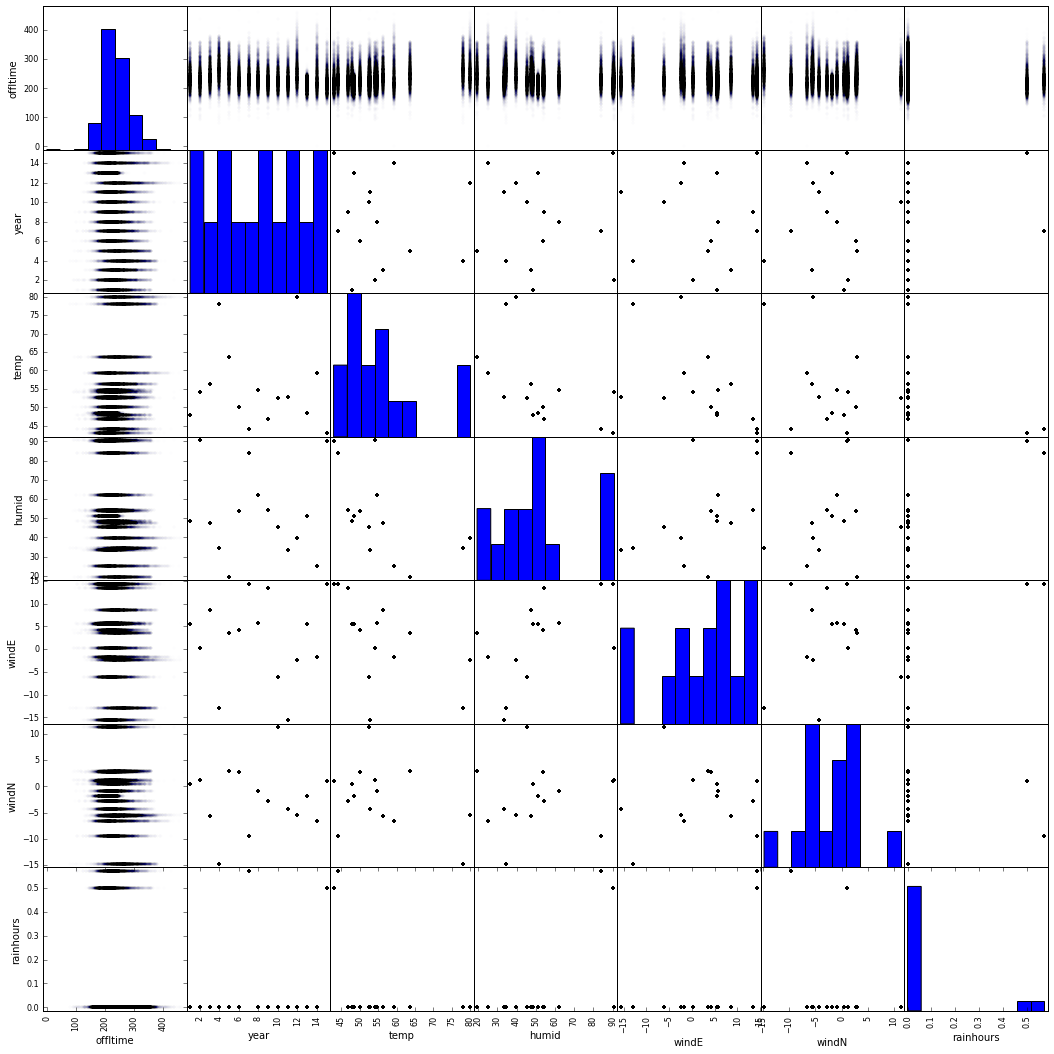

In [10]:
pd.tools.plotting.scatter_matrix(model_df[['offltime','year','temp','humid','windE','windN','rainhours']], figsize=(18,18), alpha=0.002, diagonal='hist')
plt.show()

In [9]:
count_df = model_df['home'].value_counts()
# We want to encode Kenyans (smallest, but perhaps most significant country), and cut off the smaller entries.
print 'Number of Kenyan runners:',count_df['KEN']
misc_list = count_df[count_df < 30].index
print 'Following countries encoded as MISC'
print misc_list
for ix in range(len(model_df)):
    if model_df['home'][ix] in misc_list:
        model_df.loc[ix, 'home'] = 'MISC'
print 'Number of MISC Runners:', sum(model_df['home']=='MISC')

Number of Kenyan runners: 33
Following countries encoded as MISC
Index([u'NZL', u'VEN', u'AUT', u'ISL', u'NOR', u'RSA', u'COL', u'ETH', u'POL',
       u'FIN', u'ECU', u'SIN', u'CRC', u'RUS', u'POR', u'ISR', u'GRE', u'AE',
       u'CHN', u'ARG', u'GUA', u'SVK', u'VI', u'PER', u'AP', u'CZE', u'SLO',
       u'UAE', u'LAT', u'ESA', u'HUN', u'JAM', u'PAN', u'BAH', u'URU', u'CAY',
       u'UKR', u'MAS', u'TWN', u'TUR', u'LTU', u'MAR', u'GU', u'TPE', u'QAT',
       u'EGY', u'KSA', u'AA', u'EST', u'DOM', u'AHO', u'LIB', u'NEP', u'PHI',
       u'BLR', u'INA', u'IND', u'LUX', u'TRI', u'CRO', u'ZIM', u'NGR', u'TUN',
       u'ROM', u'BOL', u'ARU', u'SCG', u'OMA'],
      dtype='object')
Number of MISC Runners: 568


In [10]:
model_df = pd.get_dummies(model_df)

# Modelling

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import Lasso

### Let's try with everything included and then try a bib-free model

In [12]:
y = model_df['offltime'].values
X = model_df.drop('offltime', axis=1).values
feature_names = model_df.drop('offltime', axis=1).columns

In [13]:
print X.shape
print y.shape
print feature_names

(60000, 84)
(60000,)
Index([u'year', u'bib', u'age', u'gender', u'temp', u'humid', u'windE',
       u'windN', u'gusty', u'rainhours', u'home_AK', u'home_AL', u'home_AR',
       u'home_AUS', u'home_AZ', u'home_BEL', u'home_BER', u'home_BRA',
       u'home_CA', u'home_CAN', u'home_CHI', u'home_CO', u'home_CT',
       u'home_DC', u'home_DE', u'home_DEN', u'home_ESP', u'home_FL',
       u'home_FRA', u'home_GA', u'home_GBR', u'home_GER', u'home_HI',
       u'home_HKG', u'home_IA', u'home_ID', u'home_IL', u'home_IN',
       u'home_IRL', u'home_ITA', u'home_JPN', u'home_KEN', u'home_KOR',
       u'home_KS', u'home_KY', u'home_LA', u'home_MA', u'home_MD', u'home_ME',
       u'home_MEX', u'home_MI', u'home_MISC', u'home_MN', u'home_MO',
       u'home_MS', u'home_MT', u'home_NC', u'home_ND', u'home_NE', u'home_NED',
       u'home_NH', u'home_NJ', u'home_NM', u'home_NV', u'home_NY', u'home_OH',
       u'home_OK', u'home_OR', u'home_PA', u'home_PR', u'home_RI', u'home_SC',
       u'home_SD', u'hom

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [15]:
model = LinearRegression()

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.622780272658
testing R2: 0.625110872855


In [16]:
model = Lasso(alpha=0.25)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)
print 
print 'Lasso Coefficients (alpha=0.25)'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(feature_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.615448095317
testing R2: 0.618705051726

Lasso Coefficients (alpha=0.25)
------------------
intercept 132.668166358
year      -2.61528049975
bib       0.00385180792792
age       0.434426721902
gender    -3.25808386544
temp      1.06073476097
humid     -0.0263670289375
windE     0.160108329357
windN     -0.165636804639
rainhours 5.17727293684
home_MA   6.77806196033


In [17]:
model = Lasso(alpha=1)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)
print 
print 'Lasso Coefficients (alpha=1.0)'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(feature_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.607941730526
testing R2: 0.611917282597

Lasso Coefficients (alpha=1.0)
------------------
intercept 132.48098447
year      -2.64381605172
bib       0.00410038615642
age       0.35532961771
temp      1.04269471159
windE     0.157157826949
windN     -0.190729699694
home_MA   0.304425733833


In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=25, max_depth=7)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.689991482508
testing R2: 0.683347132175


In [20]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=25, max_depth=10)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.743843086843
testing R2: 0.702438919326


In [21]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=25, max_depth=16)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.85673700199
testing R2: 0.71491951336


In [22]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=25, max_features=50, max_depth=16)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.865085437308
testing R2: 0.719747161354


In [23]:
model = RandomForestRegressor(n_jobs=-1, n_estimators=200, max_features=50, max_depth=16)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)

training R2: 0.865292769284
testing R2: 0.725049876444


## Try dropping BIB numbers

In [38]:
y = model_df['offltime'].values
X = model_df.drop(['offltime','bib'], axis=1).values
feature_names = model_df.drop(['offltime','bib'], axis=1).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 22)

In [41]:
model = Lasso(alpha=1.)

model.fit(X_train, y_train)
print 'training R2:',model.score(X_train, y_train)
y_predict = model.predict(X_test)
print 'testing R2:',model.score(X_test, y_test)
print 
print 'Lasso Coefficients (alpha=1.0)'
print '------------------'
print '{0:10}{1}'.format('intercept', model.intercept_)
for name, coef in zip(feature_names, model.coef_):
    if abs(coef) > 0.001:
        print '{0:10}{1}'.format(name, coef)

training R2: 0.358934937422
testing R2: 0.345968269816

Lasso Coefficients (alpha=1.0)
------------------
intercept 151.719850126
year      -0.897857657129
age       1.12378326623
gender    -22.8754523431
temp      0.987742440382
humid     -0.0421887847206
windE     0.219627677216
windN     -0.341825738208
home_MA   31.5858305859
